In [4]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Libraries for model creation....
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Load the dataset

In [5]:
df = pd.read_csv("C:\\Users/Prithish/Desktop/Graduate-Admission-Prediction-master/Admission_Predict_Ver1.1.csv")

df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
# Deleting the unwanted column
del df['Serial No.']

### Creating a label encoded column based on Chance of Admit

Because we are trying to predict a label for admission (Y/N).

In [8]:
df["Admit"] = np.where(df['Chance of Admit '] <= 0.5, 0, 1)
df["Admit"].value_counts()

1    461
0     39
Name: Admit, dtype: int64

In [9]:
# statistics on numerical data......
round(df.describe(exclude = ['object']).T, 2)

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47,11.30,290.00,308.00,317.00,325.00,340.00
TOEFL Score,500.0,107.19,6.08,92.00,103.00,107.00,112.00,120.00
University Rating,500.0,3.11,1.14,1.00,2.00,3.00,4.00,5.00
SOP,500.0,3.37,0.99,1.00,2.50,3.50,4.00,5.00
LOR,500.0,3.48,0.93,1.00,3.00,3.50,4.00,5.00
CGPA,500.0,8.58,0.60,6.80,8.13,8.56,9.04,9.92
Research,500.0,0.56,0.50,0.00,0.00,1.00,1.00,1.00
Chance of Admit,500.0,0.72,0.14,0.34,0.63,0.72,0.82,0.97
Admit,500.0,0.92,0.27,0.00,1.00,1.00,1.00,1.00


In [10]:
# Reformat column names
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceofAdmit', 'Admit'],
      dtype='object')

### Find missing values

In [11]:
#PERCENTAGE OF THE MISSING VALUES 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)

,Total,Percentage
GREScore,0,0.0
TOEFLScore,0,0.0
UniversityRating,0,0.0
SOP,0,0.0
LOR,0,0.0
CGPA,0,0.0
Research,0,0.0
ChanceofAdmit,0,0.0
Admit,0,0.0


In [12]:
# check for duplicated values
df[df.duplicated()]

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Admit


### Data Exploration

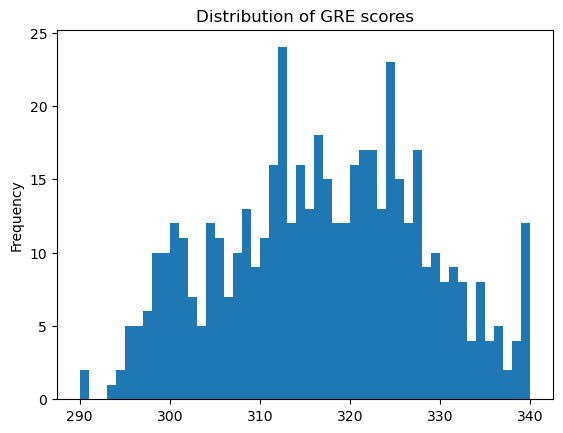

In [13]:
df.GREScore.plot(kind='hist', bins=50, title="Distribution of GRE scores");

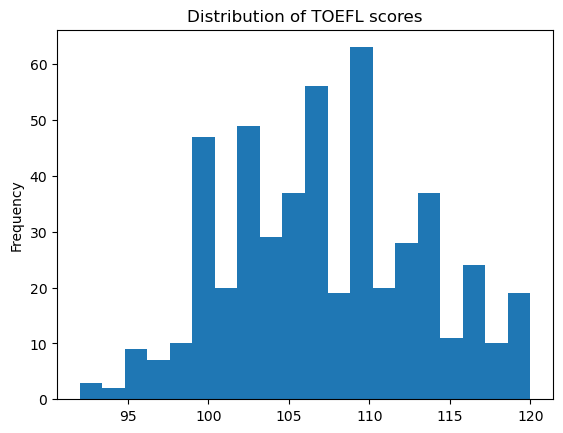

In [14]:
df.TOEFLScore.plot(kind='hist', bins=20, title="Distribution of TOEFL scores");

<AxesSubplot:>

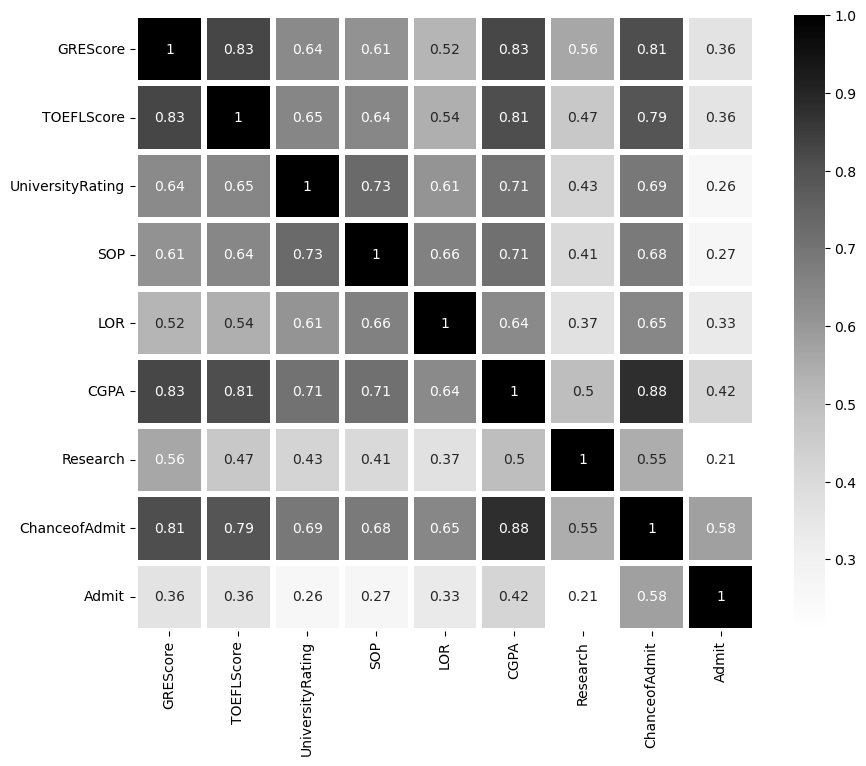

In [15]:
# correlation matrix
corrmat= df.corr()
plt.figure(figsize=(10,8))  
sns.heatmap(corrmat,annot=True,cmap = "Greys",linewidth = 3)

## Modeling

In [16]:
# Assigning the features as X and target as y
X= df.drop(["ChanceofAdmit", "Admit"],axis =1)
y= df["Admit"]

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [17]:
# Building piplines for model selection

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                      ("LR",LogisticRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                      ("DT",DecisionTreeClassifier())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                      ("RF",RandomForestClassifier())])

pipeline_knn=Pipeline([("scalar4",StandardScaler()),
                       ("KN",KNeighborsClassifier())])

pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                       ("XGB",XGBClassifier())])

pipeline_ctb=Pipeline([("scalar6",StandardScaler()),
                       ("CatBoost",CatBoostClassifier(logging_level='Silent'))])

#List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_xgb, pipeline_ctb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LogisticRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBClassifier", 5: "CatBoostClassifier"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

### Cross validating the scores

In [18]:
#Getting CV scores    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LogisticRegression: 0.946657 
DecisionTree: 0.928165 
RandomForest: 0.954765 
KNeighbors: 0.941394 
XGBClassifier: 0.951920 
CatBoostClassifier: 0.946586 


### Confusion matrix

In [19]:
ypred = pipeline_xgb.predict(X_test)
cm = confusion_matrix(y_test,ypred)
print(cm)

[[  2   8]
 [  7 108]]


In [20]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.22      0.20      0.21        10
           1       0.93      0.94      0.94       115

    accuracy                           0.88       125
   macro avg       0.58      0.57      0.57       125
weighted avg       0.87      0.88      0.88       125



## Feature importance

In [21]:
classifier = RandomForestClassifier()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

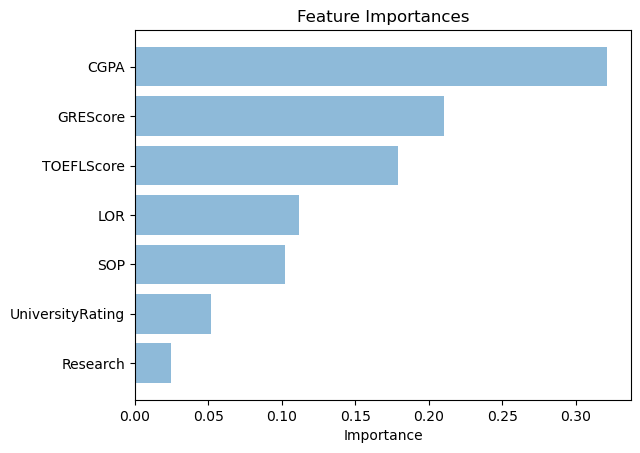

In [22]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [23]:
# Making predictions on some new data

input_data = [{'GREScore': 332, 
              'TOEFLScore': 110, 
              'UniversityRating': 3, 
              'SOP': 4.0, 
              'LOR': 4.5,
              'CGPA': 8.6,
              'Research': 1},
              
              {'GREScore': 312, 
              'TOEFLScore': 95, 
              'UniversityRating': 3, 
              'SOP': 2.0, 
              'LOR': 3.5,
              'CGPA': 7.6,
              'Research': 0},
             
             {'GREScore': 298, 
              'TOEFLScore': 110, 
              'UniversityRating': 4, 
              'SOP': 3.0, 
              'LOR': 4.5,
              'CGPA': 7.6,
              'Research': 0}]

new_data = [tuple(d.values()) for d in [v for v in [data for data in input_data]]]

In [24]:
# Convert to numpy array
test = np.asarray(new_data)
# Output Labels
labels=["reject", "admit"]
prediction = pipeline_xgb.predict(test)
prob_prediction = pipeline_xgb.predict_proba(test)

# Get number of test cases used
no_of_test_cases, cols = test.shape
for i in range(no_of_test_cases):
    print("Admission Status of Student with GRE scores = {}, TOEFL score = {}, University Rank = {}, GPA = {} will be - {} with a probability {:.3f}".format(new_data[i][0],new_data[i][1],new_data[i][2], new_data[i][5], labels[prediction[i]], prob_prediction[i][prediction[i]]))

Admission Status of Student with GRE scores = 332, TOEFL score = 110, University Rank = 3, GPA = 8.6 will be - admit with a probability 0.999
Admission Status of Student with GRE scores = 312, TOEFL score = 95, University Rank = 3, GPA = 7.6 will be - reject with a probability 0.571
Admission Status of Student with GRE scores = 298, TOEFL score = 110, University Rank = 4, GPA = 7.6 will be - admit with a probability 0.773


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

In [26]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [28]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 4ms/step - loss: 0.6221
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1279
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0891
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0700
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.0616
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.0567
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0543
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0527
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0517
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0505
Epoch 11/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0502
Epoch 12/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0497
Epoch 13/100
12/12 [=================

In [29]:
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.06819488853216171


In [30]:
# Get the predicted values for the test set
y_pred = model.predict(X_test)

# Evaluate the performance of the model using mean absolute error and R-squared metrics
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


4/4 [==============================] - 0s 3ms/step
Mean Absolute Error: 0.1264998938292265
R-squared: 0.07343900263969738


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Define the pipeline steps for data preprocessing
preprocessing = [('scale', StandardScaler())]

# Define the pipeline steps for each algorithm
gradient_boost = [('preprocess', StandardScaler()),
                  ('model', GradientBoostingClassifier())]
ada_boost = [('preprocess', StandardScaler()),
             ('model', AdaBoostClassifier())]
light_gbm = [('preprocess', StandardScaler()),
             ('model', LGBMClassifier())]
svm = [('preprocess', StandardScaler()),
       ('model', SVC())]
naive_bayes = [('preprocess', StandardScaler()),
                ('model', GaussianNB())]

# Create a list of pipelines for each algorithm
pipelines = [Pipeline(preprocessing + gradient_boost),
             Pipeline(preprocessing + ada_boost),
             Pipeline(preprocessing + light_gbm),
             Pipeline(preprocessing + svm),
             Pipeline(preprocessing + naive_bayes)]

# Print the accuracy of each algorithm using cross-validation
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    print("%s: %f " % (i+1, cv_score.mean()))


1: 0.944097 
2: 0.933144 
3: 0.962518 
4: 0.941323 
5: 0.882717 


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

# Define the pipeline steps for data preprocessing
preprocessing = [('scale', StandardScaler())]

# Define the function to create the deep learning model
def create_model():
    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the Keras model in a Scikit-Learn compatible classifier
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=0)

# Create a list of pipelines for each algorithm
pipelines = [Pipeline(preprocessing + [('deep_learning', model)])]

# Print the accuracy of each algorithm using cross-validation
for i, pipe in enumerate(pipelines):
    cv_score = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
    print("%s: %f " % (i+1, cv_score.mean()))


2/2 [==============================] - 0s 3ms/step
1: 0.936060 


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('regressor', RandomForestRegressor())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [5, 10, 15],
    'regressor__n_estimators': [50, 100, 150],
    'regressor__max_depth': [5, 10, 15]
}

# Perform GridSearchCV
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid.best_params_)
print("Best Score: ", grid.best_score_)


NameError: name 'PCA' is not defined

In [ ]:
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)),
    ('regressor', lgb.LGBMRegressor())
])

# Define the hyperparameters to tune
params = {
    'regressor__num_leaves': [31, 50, 100],
    'regressor__learning_rate': [0.05, 0.1, 0.2],
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [5, 10, -1]
}

# Perform grid search to find the best hyperparameters
grid = GridSearchCV(pipeline, params, cv=5)
grid.fit(X_train, y_train)

# Make predictions on the test data using the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the performance of the model using mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE: ', mse)
print('R2 Score: ', r2)


MSE:  0.07547783347137549
R2 Score:  -0.025514041730645642
